# Race by Census Tracts in Los Angeles County

This dataset is found on Census Reporter website. It is a five-year census data by census tracts of race in Los Angeles County. I will be specifically looking at percent White alone and percent African American population for our project.

**Import libraries.**

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

**Import census dataset and review general stats of the dataset.**

In [3]:
gdf = gpd.read_file('acs2019_5yr_B02001_14000US06037407102.geojson')

In [4]:
gdf.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5168443.0,20648.0,820478.0,3536.0,73393.0,3354.0,...,1001.0,2115548.0,22501.0,402767.0,8116.0,115953.0,3985.0,286814.0,6080.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3347.0,353.0,19.0,15.0,3.0,6.0,...,6.0,391.0,312.0,189.0,85.0,34.0,28.0,155.0,83.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2981.0,343.0,74.0,102.0,15.0,24.0,...,12.0,48.0,55.0,67.0,65.0,0.0,12.0,67.0,65.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,4647.0,612.0,198.0,165.0,0.0,17.0,...,17.0,921.0,507.0,95.0,83.0,48.0,62.0,47.0,56.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2634.0,337.0,87.0,107.0,0.0,12.0,...,12.0,497.0,231.0,143.0,87.0,11.0,18.0,132.0,86.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [5]:
#remove the "total" row.
gdf = gdf.drop([0])

In [7]:
#double check if the row is removed.
gdf.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3347.0,353.0,19.0,15.0,3.0,6.0,...,6.0,391.0,312.0,189.0,85.0,34.0,28.0,155.0,83.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2981.0,343.0,74.0,102.0,15.0,24.0,...,12.0,48.0,55.0,67.0,65.0,0.0,12.0,67.0,65.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,4647.0,612.0,198.0,165.0,0.0,17.0,...,17.0,921.0,507.0,95.0,83.0,48.0,62.0,47.0,56.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2634.0,337.0,87.0,107.0,0.0,12.0,...,12.0,497.0,231.0,143.0,87.0,11.0,18.0,132.0,86.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3350.0,394.0,205.0,232.0,0.0,12.0,...,12.0,45.0,38.0,90.0,55.0,28.0,32.0,62.0,44.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 1 to 2346
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2346 non-null   object  
 1   name              2346 non-null   object  
 2   B02001001         2346 non-null   float64 
 3   B02001001, Error  2346 non-null   float64 
 4   B02001002         2346 non-null   float64 
 5   B02001002, Error  2346 non-null   float64 
 6   B02001003         2346 non-null   float64 
 7   B02001003, Error  2346 non-null   float64 
 8   B02001004         2346 non-null   float64 
 9   B02001004, Error  2346 non-null   float64 
 10  B02001005         2346 non-null   float64 
 11  B02001005, Error  2346 non-null   float64 
 12  B02001006         2346 non-null   float64 
 13  B02001006, Error  2346 non-null   float64 
 14  B02001007         2346 non-null   float64 
 15  B02001007, Error  2346 non-null   float64 
 16  B02001008       

**Remove unuseful columns.**

In [9]:
#list the columns.
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

In [10]:
#keep the desirable columns
columns_to_keep = ['geoid',
 'name',
 'B02001001',
 'B02001002',
 'B02001003',
 'B02001004',
 'B02001005',
 'B02001006',
 'B02001007',
 'B02001008',
 'geometry']

In [11]:
gdf=gdf[columns_to_keep]
gdf.head()

,geoid,name,B02001001,B02001002,B02001003,B02001004,B02001005,B02001006,B02001007,B02001008,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


**Rename the columns.**

In [12]:
#list the current columns' names.
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001002',
 'B02001003',
 'B02001004',
 'B02001005',
 'B02001006',
 'B02001007',
 'B02001008',
 'geometry']

In [13]:
#rename them.
gdf.columns = ['geoid',
               'name',
               'Total',
               'White alone',
               'Black or African American alone',
               'American Indian and Alaska Native alone',
               'Asian alone',
               'Native Hawaiian and Other Pacific Islander alone',
               'Some other race alone',
               'Two or more races',
               'geometry']

In [14]:
#check it.
gdf.head()

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


**Spot checks**

In [18]:
#find a randam row
random_tract = gdf.sample()
random_tract

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,geometry
721,14000US06037228900,"Census Tract 2289, Los Angeles, CA",2918.0,1302.0,376.0,189.0,0.0,0.0,1022.0,29.0,"MULTIPOLYGON (((-118.24776 33.99484, -118.2455..."


In [19]:
#find its total population
random_tract.iloc[0]['Total']

2918.0

In [22]:
#add each columns to see if they add up to the total population
print(random_tract.iloc[0]['White alone'] + 
      random_tract.iloc[0]['Black or African American alone'] + 
      random_tract.iloc[0]['American Indian and Alaska Native alone'] + 
      random_tract.iloc[0]['Asian alone'] +
      random_tract.iloc[0]['Native Hawaiian and Other Pacific Islander alone'] + 
      random_tract.iloc[0]['Some other race alone'] + 
      random_tract.iloc[0]['Two or more races'])

2918.0


**Normalize the data.**

In [23]:
#list the columns' names
list(gdf)

['geoid',
 'name',
 'Total',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'geometry']

In [24]:
#convert the population to percent population
gdf['Percent White alone'] = gdf['White alone']/gdf['Total']*100
gdf['Percent Black or African American alone'] = gdf['Black or African American alone']/gdf['Total']*100
gdf['Percent American Indian and Alaska Native alone'] = gdf['American Indian and Alaska Native alone']/gdf['Total']*100
gdf['Percent Asian alone'] = gdf['Asian alone']/gdf['Total']*100
gdf['Percent Native Hawaiian and Other Pacific Islander alone'] = gdf['Native Hawaiian and Other Pacific Islander alone']/gdf['Total']*100
gdf['Percent Some other race alone'] = gdf['Some other race alone']/gdf['Total']*100
gdf['Percent Two or more races'] = gdf['Two or more races']/gdf['Total']*100

In [25]:
#check it
gdf.head()

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",78.146159,0.443614,0.070044,7.728228,0.070044,9.129115,4.412795
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",87.547724,2.173275,0.440529,6.461087,0.000000,1.409692,1.967695
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",73.215692,3.119584,0.000000,7.657161,0.000000,14.510793,1.496770
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",71.150729,2.350081,0.000000,9.211237,0.000000,13.425176,3.862777
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",86.251287,5.278064,0.000000,4.994851,0.000000,1.158599,2.317199


**Plotting!**

Text(0.5, 1.0, 'Percent Asian alone')

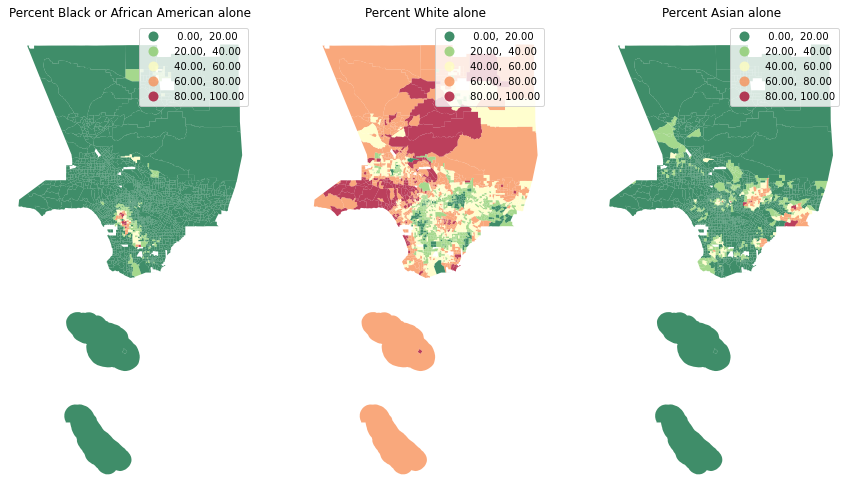

In [40]:
#mapping for percent black or African American alon, white alone, asian alone.
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

ax1, ax2, ax3 = axs

gdf.plot(column='Percent Black or African American alone', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
        )

ax1.axis("off")
ax1.set_title("Percent Black or African American alone")

gdf.plot(column='Percent White alone', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent White alone")

gdf.plot(column='Percent Asian alone', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3,
            legend=True
        )

ax3.axis("off")
ax3.set_title("Percent Asian alone")

**Finding:**
Even though the census race maps and grocery stores map are not in the same notebook (which is something I need to work on), we can find a correlation between the preference of chain stores' locations and the race and income level of the neighborhoods (income part in Nour's notebook). For example, we find that Trader Joe's and Whole Foods tend to open in more affluent white neighborhoods while Superior Grocers and Numero Uno tend to open in lower income and African American concentrated neighborhoods. Some brands like Vons and Ralphs are all over Los Angeles County.

# Author: Jinglan Lin